<a href="https://colab.research.google.com/github/ranjit-battewad/Calculator/blob/master/Copy_of_Odysse_Data_Digging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import re
import datetime
import numpy as np




In [ ]:
data = pd.read_csv("/content/Odysse_New Dataset.csv",encoding='ISO-8859-1')

<ipython-input-4-ddcaa396ad6e>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/Odysse_New Dataset.csv",encoding='ISO-8859-1')


In [ ]:
data.head(5)

,fact_aggregatedtrips_id,vehicle_reg,vehicle_id,id,full_name,location_start_datetime,start_latitude,start_longitude,location_end_datetime,Unnamed: 9,...,dropoff_time,Weekday,Weekend,TimeOfDay,Pick_up_postcode,Pick_up_streetcode,Drop_off_postcode,Drop_off_streetcode,Day_of_week,Day_name
0,220,LC18 YXR,1,2.0,Ani Zemani,2/23/2023 5:09,51Â° 33' 29.8 N,0Â° 6' 47.9 W,2/23/2023 5:31,##############################################...,...,5:31:00,True,False,Late Night,N4,NaN,EN5,5JZ,3,Thursday
1,221,LC18 YXR,1,2.0,Ani Zemani,2/23/2023 5:37,51Â° 37' 49.8 N,0Â° 10' 29.7 W,2/23/2023 6:05,NaN,...,6:05:00,True,False,Late Night,N12,0DN,W1U,6,3,Thursday
2,222,LC18 YXR,1,2.0,Ani Zemani,2/23/2023 6:05,51Â° 31' 23.3 N,0Â° 9' 29.1 W,2/23/2023 6:25,NaN,...,6:25:00,True,False,Morning,W1U,5BP,SW1V,1JT,3,Thursday
3,223,LC18 YXR,1,2.0,Ani Zemani,2/23/2023 6:30,51Â° 30' 11.7 N,0Â° 9' 6 W,2/23/2023 6:52,NaN,...,6:52:00,True,False,Morning,W1J,7BX,N1C,4,3,Thursday
4,224,LC18 YXR,1,2.0,Ani Zemani,2/23/2023 7:03,51Â° 32' 29.6 N,0Â° 8' 17.2 W,2/23/2023 7:36,NaN,...,7:36:00,True,False,Morning,NW5,NaN,NW10,7NU,3,Thursday


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27036 entries, 0 to 27035
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fact_aggregatedtrips_id  27036 non-null  int64  
 1   vehicle_reg              27036 non-null  object 
 2   vehicle_id               27036 non-null  int64  
 3   id                       26375 non-null  float64
 4   full_name                26375 non-null  object 
 5   location_start_datetime  27036 non-null  object 
 6   start_latitude           27036 non-null  object 
 7   start_longitude          27036 non-null  object 
 8   location_end_datetime    27036 non-null  object 
 9   Unnamed: 9               1 non-null      object 
 10  end_latitude             27036 non-null  object 
 11  end_longitude            27036 non-null  object 
 12  triprequestdatetime      27036 non-null  object 
 13  onjobduration_min        27036 non-null  float64
 14  Pick-up address       

In [ ]:
data['Date_Time']=pd.to_datetime(data['Date_Time'], format = '%m/%d/%Y %H:%M')

KeyError: 'Date_Time'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7749 entries, 0 to 7748
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Report_date              7749 non-null   object        
 1   Report_time              7749 non-null   object        
 2   VehicleReg               7749 non-null   object        
 3   Location_address         7749 non-null   object        
 4   Location Lat_Long        7749 non-null   object        
 5   Trips_ID                 7749 non-null   int64         
 6   Earnings                 7579 non-null   float64       
 7   Long                     7747 non-null   float64       
 8   Lat                      7749 non-null   float64       
 9   Date_Time                7749 non-null   datetime64[ns]
 10  Vehicle_Id               7749 non-null   int64         
 11  Driver_Id                7113 non-null   float64       
 12  Pick-up address          7749 non-

In [ ]:
data["Report_date"] = pd.to_datetime(data["Report_date"])

In [ ]:
data["new_time"] = pd.to_datetime(data["Report_time"],format = "%H:%M").dt.time

In [ ]:
data["new_time"].min()

datetime.time(0, 1)

In [ ]:
num_data = data[["Trips_ID","Earnings","Long","Lat","Date_Time","onjobduration_min","tripdistance"]]

In [ ]:
num_data.corr()

,Trips_ID,Earnings,Long,Lat,Date_Time,onjobduration_min,tripdistance
Trips_ID,1.000000,0.034888,-0.104844,0.045338,0.986501,-0.000486,-0.006948
Earnings,0.034888,1.000000,0.000127,-0.043061,0.036697,0.829348,0.914551
Long,-0.104844,0.000127,1.000000,-0.429432,-0.069882,-0.021825,0.016373
Lat,0.045338,-0.043061,-0.429432,1.000000,0.017266,-0.056614,-0.024285
Date_Time,0.986501,0.036697,-0.069882,0.017266,1.000000,-0.003009,-0.005186
onjobduration_min,-0.000486,0.829348,-0.021825,-0.056614,-0.003009,1.000000,0.767763
tripdistance,-0.006948,0.914551,0.016373,-0.024285,-0.005186,0.767763,1.000000


In [ ]:
data['Hour'] = data['Date_Time'].dt.hour

In [ ]:
data.head()

,Report_date,Report_time,VehicleReg,Location_address,Location Lat_Long,Trips_ID,Earnings,Long,Lat,Date_Time,...,Driver_Id,Pick-up address,Drop off address,onjobduration_min,tripdistance,earnings per trip hour,earnings per trip Miles,Trip Status,new_time,Hour
0,2024-01-01,0:29,SL20 EYR,Roundabout; SE28; in London; England; SE28 8EU;,Long : 0° 7' 23.6 E Lat : 51° 30' 37.3 N,12306,8.860000,0.123222,51.510361,2024-01-01 00:29:00,...,7.0,"45 Whernside Close, Eltham, London, London, En...","8 Woodbrook Road, Eltham, London, London, Engl...",25.083334,4.81,21.193356,1.841996,completed,00:29:00,0
1,2024-01-01,0:58,SL20 EYR,Wickham Lane (A209); in Welling; England; DA16...,Long : 0° 6' 31.5 E Lat : 51° 28' 31.8 N,12308,12.650000,0.108750,51.475498,2024-01-01 00:58:00,...,7.0,"Park View Road & Denham Close, Danson Park, Be...","Hinksey Path, London SE2 9TD, UK",14.866667,5.72,51.053810,2.211539,completed,00:58:00,0
2,2024-01-01,1:13,SL20 EYR,Wolvercote Road; SE2; in London; England; DA18...,Long : 0° 7' 42.2 E Lat : 51° 29' 45.9 N,12309,14.150000,0.128389,51.496082,2024-01-01 01:13:00,...,7.0,"102 Grosmont Road, Eltham, London, London, Eng...","St. Pauls Cray Rd, Chislehurst BR7 6QA, UK",45.116665,11.51,18.817879,1.229366,completed,01:13:00,1
3,2024-01-01,1:48,SL20 EYR,St Pauls Cray Road (A208); in Chislehurst; Eng...,Long : 0° 4' 46.1 E Lat : 51° 24' 33.3 N,12310,18.930000,0.079472,51.409248,2024-01-01 01:48:00,...,7.0,"26 Bromley Lane, Bromley, Chislehurst, Kent, E...","Creswell Dr, Beckenham BR3, UK",36.150002,8.97,31.419086,2.110368,completed,01:48:00,1
4,2024-01-01,2:16,SL20 EYR,6 Creswell Drive; in Beckenham; England; BR3 3FX;,Long : 0° 1' 9.4 W Lat : 51° 23' 30.7 N,12311,22.700001,-0.019278,51.391861,2024-01-01 02:16:00,...,7.0,"Southend Rd, Beckenham BR3 1SA, UK","Watteau Sq, Croydon CR0 3BZ, UK",48.566666,8.88,28.043926,2.556306,completed,02:16:00,2


In [ ]:
data['Month'] = data['Date_Time'].dt.month

In [ ]:
data['Minutes'] = data['Date_Time'].dt.minute

In [ ]:
data.head(5)

,Report_date,Report_time,VehicleReg,Location_address,Location Lat_Long,Trips_ID,Earnings,Long,Lat,Date_Time,...,Drop off address,onjobduration_min,tripdistance,earnings per trip hour,earnings per trip Miles,Trip Status,new_time,Hour,Month,Minutes
0,2024-01-01,0:29,SL20 EYR,Roundabout; SE28; in London; England; SE28 8EU;,Long : 0° 7' 23.6 E Lat : 51° 30' 37.3 N,12306,8.860000,0.123222,51.510361,2024-01-01 00:29:00,...,"8 Woodbrook Road, Eltham, London, London, Engl...",25.083334,4.81,21.193356,1.841996,completed,00:29:00,0,1,29
1,2024-01-01,0:58,SL20 EYR,Wickham Lane (A209); in Welling; England; DA16...,Long : 0° 6' 31.5 E Lat : 51° 28' 31.8 N,12308,12.650000,0.108750,51.475498,2024-01-01 00:58:00,...,"Hinksey Path, London SE2 9TD, UK",14.866667,5.72,51.053810,2.211539,completed,00:58:00,0,1,58
2,2024-01-01,1:13,SL20 EYR,Wolvercote Road; SE2; in London; England; DA18...,Long : 0° 7' 42.2 E Lat : 51° 29' 45.9 N,12309,14.150000,0.128389,51.496082,2024-01-01 01:13:00,...,"St. Pauls Cray Rd, Chislehurst BR7 6QA, UK",45.116665,11.51,18.817879,1.229366,completed,01:13:00,1,1,13
3,2024-01-01,1:48,SL20 EYR,St Pauls Cray Road (A208); in Chislehurst; Eng...,Long : 0° 4' 46.1 E Lat : 51° 24' 33.3 N,12310,18.930000,0.079472,51.409248,2024-01-01 01:48:00,...,"Creswell Dr, Beckenham BR3, UK",36.150002,8.97,31.419086,2.110368,completed,01:48:00,1,1,48
4,2024-01-01,2:16,SL20 EYR,6 Creswell Drive; in Beckenham; England; BR3 3FX;,Long : 0° 1' 9.4 W Lat : 51° 23' 30.7 N,12311,22.700001,-0.019278,51.391861,2024-01-01 02:16:00,...,"Watteau Sq, Croydon CR0 3BZ, UK",48.566666,8.88,28.043926,2.556306,completed,02:16:00,2,1,16


In [ ]:
data['Minutes'] = data['Date_Time'].dt.minute

In [ ]:
data['Day'] = data['Date_Time'].dt.day_name()

In [ ]:
data.head(5)

,Report_date,Report_time,VehicleReg,Location_address,Location Lat_Long,Trips_ID,Earnings,Long,Lat,Date_Time,...,onjobduration_min,tripdistance,earnings per trip hour,earnings per trip Miles,Trip Status,new_time,Hour,Month,Minutes,Day
0,2024-01-01,0:29,SL20 EYR,Roundabout; SE28; in London; England; SE28 8EU;,Long : 0° 7' 23.6 E Lat : 51° 30' 37.3 N,12306,8.860000,0.123222,51.510361,2024-01-01 00:29:00,...,25.083334,4.81,21.193356,1.841996,completed,00:29:00,0,1,29,Monday
1,2024-01-01,0:58,SL20 EYR,Wickham Lane (A209); in Welling; England; DA16...,Long : 0° 6' 31.5 E Lat : 51° 28' 31.8 N,12308,12.650000,0.108750,51.475498,2024-01-01 00:58:00,...,14.866667,5.72,51.053810,2.211539,completed,00:58:00,0,1,58,Monday
2,2024-01-01,1:13,SL20 EYR,Wolvercote Road; SE2; in London; England; DA18...,Long : 0° 7' 42.2 E Lat : 51° 29' 45.9 N,12309,14.150000,0.128389,51.496082,2024-01-01 01:13:00,...,45.116665,11.51,18.817879,1.229366,completed,01:13:00,1,1,13,Monday
3,2024-01-01,1:48,SL20 EYR,St Pauls Cray Road (A208); in Chislehurst; Eng...,Long : 0° 4' 46.1 E Lat : 51° 24' 33.3 N,12310,18.930000,0.079472,51.409248,2024-01-01 01:48:00,...,36.150002,8.97,31.419086,2.110368,completed,01:48:00,1,1,48,Monday
4,2024-01-01,2:16,SL20 EYR,6 Creswell Drive; in Beckenham; England; BR3 3FX;,Long : 0° 1' 9.4 W Lat : 51° 23' 30.7 N,12311,22.700001,-0.019278,51.391861,2024-01-01 02:16:00,...,48.566666,8.88,28.043926,2.556306,completed,02:16:00,2,1,16,Monday


In [ ]:
data.columns

Index(['Report_date', 'Report_time', 'VehicleReg', 'Location_address',
       'Location Lat_Long', 'Trips_ID', 'Earnings', 'Long', 'Lat', 'Date_Time',
       'Vehicle_Id', 'Driver_Id', 'Pick-up address', 'Drop off address',
       'onjobduration_min', 'tripdistance', 'earnings per trip hour',
       'earnings per trip Miles', 'Trip Status', 'new_time', 'Hour', 'Month',
       'Minutes', 'Day'],
      dtype='object')

In [ ]:
data['onjobduration_min'].mean()

28.704501643801265

In [ ]:
data['onjobduration_min'].max()

247.1166687

In [ ]:
data.groupby('Hour')['Earnings'].mean().sort_values(ascending = False)

,Earnings
Hour,
5,20.357103
4,16.440430
1,14.485000
23,14.393033
10,13.676855
2,13.423571
0,12.881149
13,12.845724
6,12.796677


In [ ]:
result = data.groupby('Hour').agg(
    ride_count=('Trips_ID', 'size'),  # Count of rides
    average_earnings=('Earnings', 'mean'),
).reset_index()

# Sort by average_earnings in descending order
result = result.sort_values(by='average_earnings', ascending=False)

print(result)

    Hour  ride_count  average_earnings
5      5         116         20.357103
4      4         100         16.440430
1      1          71         14.485000
23    23         123         14.393033
10    10         598         13.676855
2      2          56         13.423571
0      0          87         12.881149
13    13         450         12.845724
6      6         325         12.796677
11    11         412         12.723186
22    22         205         12.440197
8      8         434         12.216262
15    15         404         12.073147
7      7         439         12.000000
14    14         374         11.939919
12    12         394         11.896010
16    16         460         11.891148
17    17         564         11.821733
18    18         578         11.728049
3      3          59         11.585294
21    21         270         11.479699
19    19         533         10.923340
20    20         434         10.840257
9      9         263          8.410506


In [ ]:
result1 = data.groupby('Driver_Id').agg(
    ride_count=('Trips_ID', 'size'),  # Count of rides
    average_earnings=('Earnings', 'mean'),
).reset_index()

# Sort by average_earnings in descending order
result = result.sort_values(by='average_earnings', ascending=False)

print(result)

    Hour  ride_count  average_earnings
5      5         116         20.357103
4      4         100         16.440430
1      1          71         14.485000
23    23         123         14.393033
10    10         598         13.676855
2      2          56         13.423571
0      0          87         12.881149
13    13         450         12.845724
6      6         325         12.796677
11    11         412         12.723186
22    22         205         12.440197
8      8         434         12.216262
15    15         404         12.073147
7      7         439         12.000000
14    14         374         11.939919
12    12         394         11.896010
16    16         460         11.891148
17    17         564         11.821733
18    18         578         11.728049
3      3          59         11.585294
21    21         270         11.479699
19    19         533         10.923340
20    20         434         10.840257
9      9         263          8.410506


In [ ]:
data.columns

Index(['Report_date', 'Report_time', 'VehicleReg', 'Location_address',
       'Location Lat_Long', 'Trips_ID', 'Earnings', 'Long', 'Lat', 'Date_Time',
       'Vehicle_Id', 'Driver_Id', 'Pick-up address', 'Drop off address',
       'onjobduration_min', 'tripdistance', 'earnings per trip hour',
       'earnings per trip Miles', 'Trip Status', 'new_time', 'Hour', 'Month',
       'Minutes', 'Day'],
      dtype='object')

In [ ]:
result1 = data.groupby(['Hour', 'Driver_Id']).agg(
    rides_by_driver=('Trips_ID', 'size')  # Count rides taken by each driver
).reset_index()

result1

,Hour,Driver_Id,rides_by_driver
0,0,6.0,22
1,0,7.0,2
2,0,25.0,37
3,0,35.0,1
4,0,52.0,4
...,...,...,...
419,23,53.0,3
420,23,60.0,2
421,23,64.0,3
422,23,85.0,8


In [ ]:
merged_result = pd.merge(result, result1, on='Hour')

In [ ]:
final_result = merged_result.sort_values(by= 'ride_count', ascending=False)

In [ ]:
final_result

,Hour,ride_count,average_earnings,Driver_Id,rides_by_driver
42,10,598,13.676855,52.0,18
44,10,598,13.676855,57.0,2
34,10,598,13.676855,16.0,91
35,10,598,13.676855,22.0,1
37,10,598,13.676855,25.0,131
...,...,...,...,...,...
332,3,59,11.585294,25.0,43
54,2,56,13.423571,6.0,13
56,2,56,13.423571,25.0,38
57,2,56,13.423571,52.0,3


In [ ]:
driver_rides_per_hour = data.groupby(['Hour', 'Driver_Id']).agg(
    rides_by_driver=('Trips_ID', 'size')
).reset_index()
print(driver_rides_per_hour)

     Hour  Driver_Id  rides_by_driver
0       0        6.0               22
1       0        7.0                2
2       0       25.0               37
3       0       35.0                1
4       0       52.0                4
..    ...        ...              ...
419    23       53.0                3
420    23       60.0                2
421    23       64.0                3
422    23       85.0                8
423    23       87.0                1

[424 rows x 3 columns]


In [ ]:
# hourly_avg_earnings = data.groupby('Hour').agg(
#     average_earnings=('Earnings', 'mean')
# ).reset_index()

# # Step 2: Count the number of rides taken by each driver per hour
# driver_rides_per_hour = data.groupby(['Hour', 'Driver_Id']).agg(
#     rides_by_driver=('Trips_ID', 'size')
# ).reset_index()

# # Step 3: Combine driver-wise ride counts into a single string for each hour
# driver_rides_per_hour['driver_info'] = driver_rides_per_hour.apply(
#     lambda row: f"DriverID {row['Driver_Id']}: {row['rides_by_driver']} rides", axis=1)

# # Step 4: Group the driver info by Hour and aggregate the text for each driver
# driver_summary = driver_rides_per_hour.groupby('Hour').agg(
#     driver_details=('driver_info', ', '.join)
# ).reset_index()

# # Step 5: Merge average earnings with driver details
# final_result = pd.merge(hourly_avg_earnings, driver_summary, on='Hour')

# # Step 6: Format the result to show Hours, Average Earnings, and Driver Ride Counts
# final_result['output'] = final_result.apply(
#     lambda row: f"At {row['Hour']} the average earning was {row['average_earnings']:.2f}, {row['driver_details']}", axis=1)

# # Display the final result
# for entry in final_result['output']:
#     print(entry)

In [ ]:
# hourly_avg_earnings = data.groupby('Hour').agg(
#     average_earnings=('Earnings', 'mean')
# ).reset_index()

# # Step 2: Count the number of rides taken by each driver per hour
# driver_rides_per_hour = data.groupby(['Hour', 'Driver_Id']).agg(
#     rides_by_driver=('Trips_ID', 'size')
# ).reset_index()

# # Step 3: Pivot the data to have Driver_IDs as columns
# pivoted_data = driver_rides_per_hour.pivot(index='Hour', columns='Driver_Id', values='rides_by_driver')

# # Step 4: Merge the pivoted data (driver rides) with the average earnings per hour
# final_result = pd.merge(hourly_avg_earnings, pivoted_data, on='Hour')

# # Display the final DataFrame
# print(final_result)

In [ ]:
from sklearn.cluster import dbscan,DBSCAN
import folium
from folium.plugins import MarkerCluster

In [ ]:
data.head(2)

,Report_date,Report_time,VehicleReg,Location_address,Location Lat_Long,Trips_ID,Earnings,Long,Lat,Date_Time,...,onjobduration_min,tripdistance,earnings per trip hour,earnings per trip Miles,Trip Status,new_time,Hour,Month,Minutes,Day
0,2024-01-01,0:29,SL20 EYR,Roundabout; SE28; in London; England; SE28 8EU;,Long : 0° 7' 23.6 E Lat : 51° 30' 37.3 N,12306,8.86,0.123222,51.510361,2024-01-01 00:29:00,...,25.083334,4.81,21.193356,1.841996,completed,00:29:00,0,1,29,Monday
1,2024-01-01,0:58,SL20 EYR,Wickham Lane (A209); in Welling; England; DA16...,Long : 0° 6' 31.5 E Lat : 51° 28' 31.8 N,12308,12.65,0.108750,51.475498,2024-01-01 00:58:00,...,14.866667,5.72,51.053810,2.211539,completed,00:58:00,0,1,58,Monday


In [ ]:
data.isnull().sum()

,0
Report_date,0
Report_time,0
VehicleReg,0
Location_address,0
Location Lat_Long,0
Trips_ID,0
Earnings,170
Long,2
Lat,0
Date_Time,0


In [ ]:
data =data.dropna(subset = ['Long'])

In [ ]:
coordinates = data[['Long','Lat']].values

In [ ]:
dbs = DBSCAN(eps = .01, min_samples=30, algorithm='ball_tree').fit(coordinates)
data['Cluster'] = dbs.labels_

<ipython-input-39-3a0d6a3c1869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = dbs.labels_


In [ ]:
data.head()

,Report_date,Report_time,VehicleReg,Location_address,Location Lat_Long,Trips_ID,Earnings,Long,Lat,Date_Time,...,tripdistance,earnings per trip hour,earnings per trip Miles,Trip Status,new_time,Hour,Month,Minutes,Day,Cluster
0,2024-01-01,0:29,SL20 EYR,Roundabout; SE28; in London; England; SE28 8EU;,Long : 0° 7' 23.6 E Lat : 51° 30' 37.3 N,12306,8.860000,0.123222,51.510361,2024-01-01 00:29:00,...,4.81,21.193356,1.841996,completed,00:29:00,0,1,29,Monday,0
1,2024-01-01,0:58,SL20 EYR,Wickham Lane (A209); in Welling; England; DA16...,Long : 0° 6' 31.5 E Lat : 51° 28' 31.8 N,12308,12.650000,0.108750,51.475498,2024-01-01 00:58:00,...,5.72,51.053810,2.211539,completed,00:58:00,0,1,58,Monday,-1
2,2024-01-01,1:13,SL20 EYR,Wolvercote Road; SE2; in London; England; DA18...,Long : 0° 7' 42.2 E Lat : 51° 29' 45.9 N,12309,14.150000,0.128389,51.496082,2024-01-01 01:13:00,...,11.51,18.817879,1.229366,completed,01:13:00,1,1,13,Monday,0
3,2024-01-01,1:48,SL20 EYR,St Pauls Cray Road (A208); in Chislehurst; Eng...,Long : 0° 4' 46.1 E Lat : 51° 24' 33.3 N,12310,18.930000,0.079472,51.409248,2024-01-01 01:48:00,...,8.97,31.419086,2.110368,completed,01:48:00,1,1,48,Monday,-1
4,2024-01-01,2:16,SL20 EYR,6 Creswell Drive; in Beckenham; England; BR3 3FX;,Long : 0° 1' 9.4 W Lat : 51° 23' 30.7 N,12311,22.700001,-0.019278,51.391861,2024-01-01 02:16:00,...,8.88,28.043926,2.556306,completed,02:16:00,2,1,16,Monday,-1


In [ ]:
data['Cluster'].unique()

array([ 0, -1,  1,  2,  3,  4, 16,  5,  9,  7,  6, 13, 15, 10,  8, 12, 20,
       19, 11, 14, 21, 18, 17])

In [ ]:
cluster_counts = data.groupby('Cluster').size()
cluster_counts.sort_values(ascending = False)

,0
Cluster,
-1,3339
3,1417
7,1178
10,332
12,192
6,183
18,176
5,137
0,119


In [ ]:
res = data.groupby('Cluster')['Earnings'].mean().reset_index()
print(res)

    Cluster   Earnings
0        -1  12.288616
1         0  12.052119
2         1  10.315636
3         2   8.233906
4         3  14.530536
5         4  12.315909
6         5  13.495630
7         6   8.580508
8         7   8.716618
9         8  11.800000
10        9  13.529032
11       10  13.170000
12       11  11.570000
13       12  13.227403
14       13  10.739211
15       14  12.393823
16       15  12.899762
17       16  12.769200
18       17  10.506415
19       18   9.765241
20       19  20.091333
21       20  34.317073
22       21  16.704667


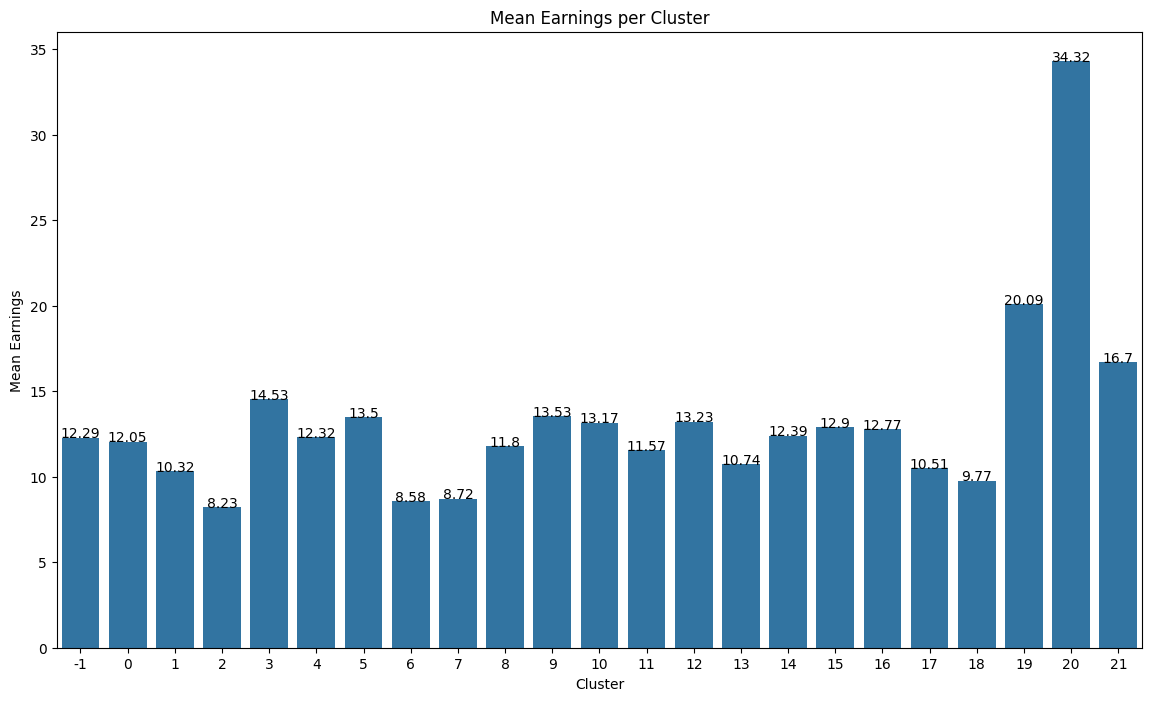

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by cluster and calculate the mean of earnings
res = data.groupby('Cluster')['Earnings'].mean().reset_index()

plt.figure(figsize = (14,8))
# Create a bar plot
barplot = sns.barplot(x='Cluster', y='Earnings', width = 0.8, data=res)

# Add labels to each bar
for index, row in res.iterrows():
    barplot.text(index, row.Earnings, round(row.Earnings, 2), color='black', ha="center")

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Mean Earnings')
plt.title('Mean Earnings per Cluster')

# Show the plot
plt.show()

In [ ]:
data.head(2)

,Report_date,Report_time,VehicleReg,Location_address,Location Lat_Long,Trips_ID,Earnings,Long,Lat,Date_Time,...,tripdistance,earnings per trip hour,earnings per trip Miles,Trip Status,new_time,Hour,Month,Minutes,Day,Cluster
0,2024-01-01,0:29,SL20 EYR,Roundabout; SE28; in London; England; SE28 8EU;,Long : 0° 7' 23.6 E Lat : 51° 30' 37.3 N,12306,8.86,0.123222,51.510361,2024-01-01 00:29:00,...,4.81,21.193356,1.841996,completed,00:29:00,0,1,29,Monday,0
1,2024-01-01,0:58,SL20 EYR,Wickham Lane (A209); in Welling; England; DA16...,Long : 0° 6' 31.5 E Lat : 51° 28' 31.8 N,12308,12.65,0.108750,51.475498,2024-01-01 00:58:00,...,5.72,51.053810,2.211539,completed,00:58:00,0,1,58,Monday,-1


In [ ]:
res1 = data.groupby('Cluster')['tripdistance'].mean().reset_index()
res1 = (res1).sort_values(by='tripdistance',ascending = False)
print(res1)

    Cluster  tripdistance
21       20     32.025610
20       19     20.122667
22       21     13.186333
5         4     10.542667
16       15     10.502174
1         0     10.434790
17       16      9.945882
13       12      9.913594
15       14      9.912500
10        9      9.780957
0        -1      9.560036
11       10      9.303163
6         5      8.783285
14       13      8.608947
4         3      8.601390
2         1      8.155862
18       17      7.986667
19       18      7.478182
12       11      7.201463
9         8      7.173243
3         2      6.264615
7         6      6.016339
8         7      5.549618


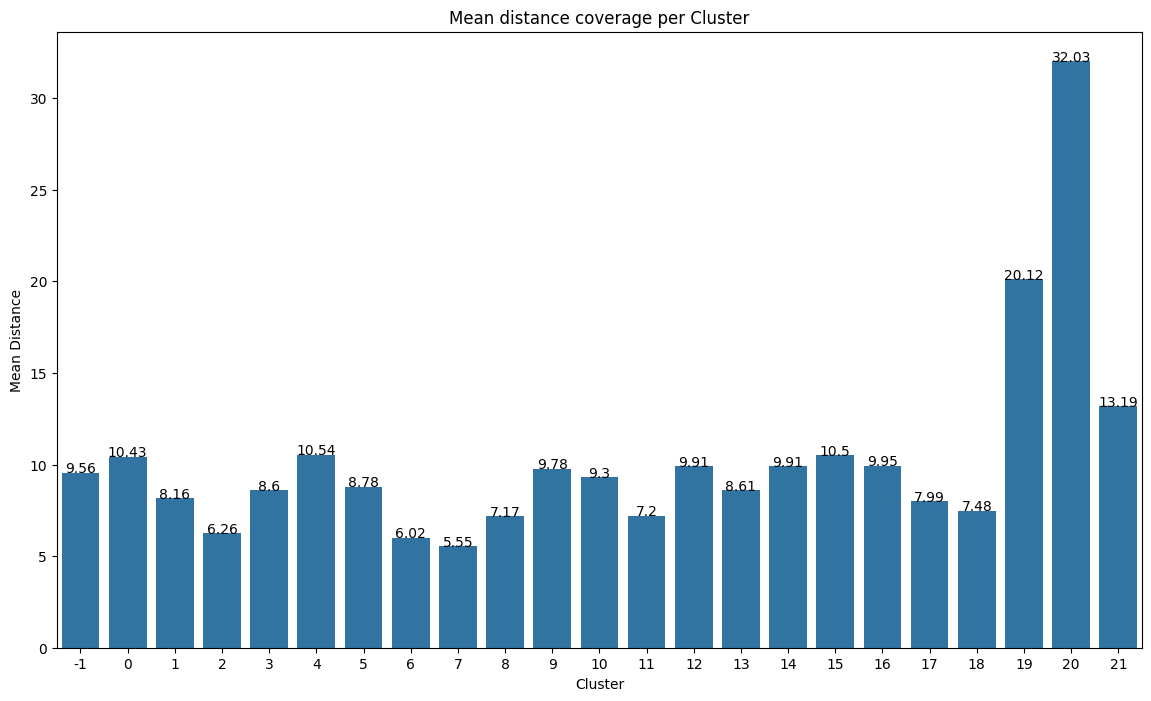

In [ ]:
plt.figure(figsize = (14,8))
res1 = data.groupby('Cluster')['tripdistance'].mean().reset_index()
bplot = sns.barplot(x='Cluster', y= 'tripdistance', data =res1)

for index,row in res1.iterrows():
  bplot.text(index,row.tripdistance,round(row.tripdistance,2), ha ='center')


plt.xlabel('Cluster')
plt.ylabel('Mean Distance')
plt.title('Mean distance coverage per Cluster')

# Show the plot
plt.show()

In [ ]:
res2 = data.groupby('Cluster')['earnings per trip hour'].mean().reset_index()
res2 = res2.sort_values(by ='earnings per trip hour', ascending = False)
# bplot = sns.barplot(x='Cluster', y= 'earnings per trip hour', data =res1)
print(res2)

    Cluster  earnings per trip hour
21       20               34.772690
22       21               27.555325
19       18               27.275937
14       13               27.012437
2         1               26.810326
9         8               26.742184
18       17               26.649215
11       10               26.619759
13       12               26.602313
0        -1               26.168313
4         3               25.803586
3         2               25.781607
10        9               25.627394
1         0               25.283203
5         4               25.234740
20       19               24.379769
6         5               24.259875
12       11               24.247811
16       15               24.228182
8         7               24.081767
7         6               23.953571
15       14               23.807825
17       16               22.949679


In [ ]:
data.columns

Index(['Report_date', 'Report_time', 'VehicleReg', 'Location_address',
       'Location Lat_Long', 'Trips_ID', 'Earnings', 'Long', 'Lat', 'Date_Time',
       'Vehicle_Id', 'Driver_Id', 'Pick-up address', 'Drop off address',
       'onjobduration_min', 'tripdistance', 'earnings per trip hour',
       'earnings per trip Miles', 'Trip Status', 'new_time', 'Hour', 'Month',
       'Minutes', 'Day', 'Cluster'],
      dtype='object')

In [ ]:
res3 = data.groupby('Cluster')['onjobduration_min'].mean().reset_index()
res3 = res3.sort_values(by = 'onjobduration_min', ascending = False)
print(res3)

    Cluster  onjobduration_min
21       20          63.278455
20       19          39.069445
22       21          35.532778
17       16          34.567974
4         3          34.029487
16       15          33.805435
10        9          33.750355
6         5          33.252433
5         4          32.339630
12       11          30.359350
11       10          30.267871
15       14          30.222348
13       12          29.904254
1         0          28.704062
9         8          28.494595
0        -1          28.273021
14       13          24.252632
2         1          23.217816
18       17          22.967593
8         7          22.879089
7         6          22.411020
19       18          21.499432
3         2          19.392308


In [ ]:
data.info()

NameError: name 'data' is not defined

In [ ]:
res4 = data.groupby('Hour')['onjobduration_min'].mean().reset_index()
res4 = res4.sort_values(by = 'onjobduration_min', ascending = False)
print(res4)

    Hour  onjobduration_min
5      5          33.742960
10    10          32.800084
4      4          32.285000
11    11          31.004288
13    13          30.881222
14    14          30.676203
15    15          30.547979
12    12          29.992090
16    16          29.970543
17    17          29.621749
7      7          29.256074
23    23          29.056640
8      8          28.962558
3      3          28.729096
18    18          28.240583
22    22          27.407886
6      6          27.005093
21    21          25.490556
1      1          25.147887
19    19          25.137649
0      0          24.610536
2      2          24.593750
20    20          24.473925
9      9          20.132256


In [ ]:
result1 = data.groupby('Driver_Id').agg(
    ride_count=('Trips_ID', 'size'),  # Count of rides
    average_earnings=('Earnings', 'mean'),
).reset_index()

# Sort by average_earnings in descending order
result = result.sort_values(by='average_earnings', ascending=False)

print(result)

    Hour  ride_count  average_earnings
5      5         116         20.357103
4      4         100         16.440430
1      1          71         14.485000
23    23         123         14.393033
10    10         598         13.676855
2      2          56         13.423571
0      0          87         12.881149
13    13         450         12.845724
6      6         325         12.796677
11    11         412         12.723186
22    22         205         12.440197
8      8         434         12.216262
15    15         404         12.073147
7      7         439         12.000000
14    14         374         11.939919
12    12         394         11.896010
16    16         460         11.891148
17    17         564         11.821733
18    18         578         11.728049
3      3          59         11.585294
21    21         270         11.479699
19    19         533         10.923340
20    20         434         10.840257
9      9         263          8.410506


In [ ]:
data.columns

Index(['Report_date', 'Report_time', 'VehicleReg', 'Location_address',
       'Location Lat_Long', 'Trips_ID', 'Earnings', 'Long', 'Lat', 'Date_Time',
       'Vehicle_Id', 'Driver_Id', 'Pick-up address', 'Drop off address',
       'onjobduration_min', 'tripdistance', 'earnings per trip hour',
       'earnings per trip Miles', 'Trip Status', 'new_time', 'Hour', 'Month',
       'Minutes', 'Day', 'Cluster'],
      dtype='object')

In [ ]:
result5 = data.groupby('Cluster').agg(
    earnings = ('Earnings','mean'),
    mean_distance_covered= ('tripdistance', 'mean'),
    rides_count = ('Trips_ID', 'size'),
    time_spent = ('onjobduration_min','mean')
)

result5 = result5.sort_values(by = 'earnings', ascending = False)

print(result5)

          earnings  mean_distance_covered  rides_count  time_spent
Cluster                                                           
 20      34.317073              32.025610           41   63.278455
 19      20.091333              20.122667           30   39.069445
 21      16.704667              13.186333           30   35.532778
 3       14.530536               8.601390         1417   34.029487
 9       13.529032               9.780957           94   33.750355
 5       13.495630               8.783285          137   33.252433
 12      13.227403               9.913594          192   29.904254
 10      13.170000               9.303163          332   30.267871
 15      12.899762              10.502174           46   33.805435
 16      12.769200               9.945882           51   34.567974
 14      12.393823               9.912500           44   30.222348
 4       12.315909              10.542667           45   32.339630
-1       12.288616               9.560036         3339   28.27

In [ ]:
df = pd.DataFrame(result5)
df

,earnings,mean_distance_covered,rides_count,time_spent
Cluster,,,,
20,34.317073,32.025610,41,63.278455
19,20.091333,20.122667,30,39.069445
21,16.704667,13.186333,30,35.532778
3,14.530536,8.601390,1417,34.029487
9,13.529032,9.780957,94,33.750355
5,13.495630,8.783285,137,33.252433
12,13.227403,9.913594,192,29.904254
10,13.170000,9.303163,332,30.267871
15,12.899762,10.502174,46,33.805435


In [ ]:
result6 = data.groupby('Hour').agg(
    earnings = ('Earnings','mean'),
    mean_distance_covered= ('tripdistance', 'mean'),
    rides_count = ('Trips_ID', 'size'),
    time_spent = ('onjobduration_min','mean')
)

result6 = pd.DataFrame(result6.sort_values(by = 'earnings', ascending = False))

print(result6)

       earnings  mean_distance_covered  rides_count  time_spent
Hour                                                           
5     20.357103              16.372327          116   33.742960
4     16.440430              13.795500          100   32.285000
1     14.485000               9.593803           71   25.147887
23    14.393033              10.567073          123   29.056640
10    13.676855              10.676789          598   32.800084
2     13.423571              10.080536           56   24.593750
0     12.881149               9.310575           87   24.610536
13    12.845724               9.003533          450   30.881222
6     12.796677              10.218827          324   27.005093
11    12.723186               9.369976          412   31.004288
22    12.440197               9.157854          205   27.407886
8     12.216262               8.138917          434   28.962558
15    12.073147               8.535371          404   30.547979
7     12.000000               8.395604  

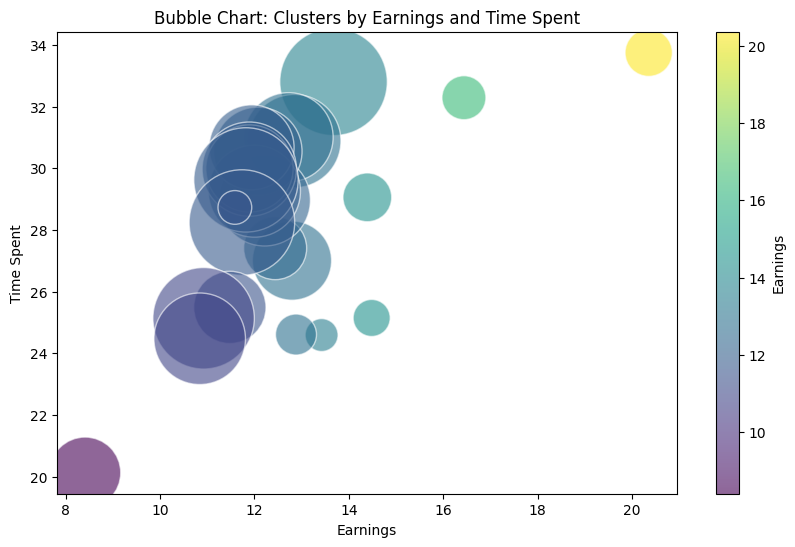

In [ ]:


# Create Bubble Chart
plt.figure(figsize=(10, 6))

# Scatter Plot where 'rides_count' determines bubble size, and color represents 'earnings'
plt.scatter(result6.earnings, result6.time_spent,
            s=result6.rides_count * 10,  # Adjust bubble size (multiply by 10 to scale up)
            c=result6.earnings, cmap='viridis', alpha=0.6, edgecolors='w')

plt.title('Bubble Chart: Clusters by Earnings and Time Spent')
plt.xlabel('Earnings')
plt.ylabel('Time Spent')

# # Add cluster labels next to the bubbles
# for i in range(len(df)):
#     plt.text(result6.earnings[i], result6.time_spent[i], data['Cluster'][i], fontsize=9)

plt.colorbar(label='Earnings')
plt.show()

In [ ]:
cluster_agg = data.groupby('Cluster').agg(
    time_spent =('onjobduration_min','mean'),
    mean_distance_covered= ('tripdistance', 'mean')
).reset_index()




<ipython-input-59-3fa59775761e>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_agg['Cluster'],cluster_agg['time_spent'],


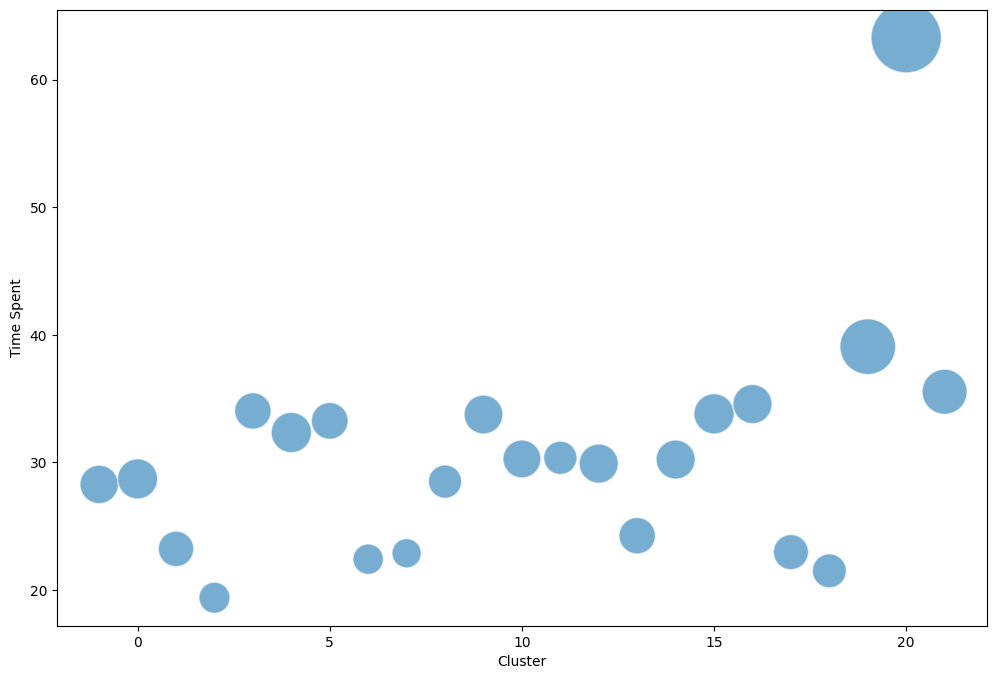

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(cluster_agg['Cluster'],cluster_agg['time_spent'],
            s= cluster_agg['mean_distance_covered']*80,  cmap='plasma', alpha=0.6, edgecolors='w')

plt.xlabel('Cluster')
plt.ylabel('Time Spent')
plt.show()

In [ ]:
timedata= data.groupby(['Cluster','Hour']).agg(
    rides_count = ('Trips_ID', 'size')).reset_index()

In [ ]:
pt =timedata.pivot(index = 'Cluster', columns = 'Hour', values='rides_count')
pt = pd.DataFrame(pt)
pt = pt.fillna(0)
pt.reset_index(inplace=True)

pd.set_option('display.max_columns', None)
pt.head(24)

Hour,Cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-1,51.0,40.0,31.0,35.0,38.0,44.0,141.0,200.0,190.0,115.0,246.0,161.0,142.0,157.0,156.0,172.0,223.0,242.0,246.0,237.0,190.0,141.0,81.0,60.0
1,0,1.0,1.0,0.0,0.0,2.0,13.0,7.0,8.0,7.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,2.0,10.0,9.0,20.0,13.0,3.0,1.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,9.0,11.0,3.0,7.0,6.0,6.0,4.0,0.0,3.0,0.0,4.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0
3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,4.0,4.0,5.0,5.0,6.0,3.0,7.0,7.0,3.0,4.0,2.0,1.0,1.0,0.0,0.0
4,3,8.0,10.0,8.0,3.0,10.0,15.0,31.0,53.0,86.0,44.0,167.0,102.0,91.0,109.0,71.0,65.0,70.0,96.0,110.0,88.0,72.0,43.0,38.0,27.0
5,4,0.0,0.0,0.0,0.0,0.0,0.0,11.0,6.0,2.0,1.0,1.0,3.0,4.0,1.0,2.0,0.0,1.0,3.0,4.0,1.0,3.0,2.0,0.0,0.0
6,5,2.0,1.0,0.0,3.0,0.0,3.0,2.0,8.0,2.0,5.0,6.0,5.0,3.0,8.0,10.0,9.0,17.0,21.0,12.0,4.0,7.0,3.0,3.0,3.0
7,6,0.0,0.0,0.0,0.0,0.0,0.0,2.0,11.0,7.0,3.0,10.0,8.0,21.0,15.0,21.0,17.0,7.0,10.0,8.0,15.0,19.0,6.0,3.0,0.0
8,7,7.0,3.0,2.0,1.0,0.0,1.0,73.0,77.0,72.0,43.0,82.0,61.0,68.0,91.0,59.0,64.0,54.0,111.0,90.0,81.0,62.0,35.0,33.0,8.0
9,8,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,6.0,6.0,0.0,2.0,0.0


In [ ]:
driver_rides_counts = data.groupby(['Driver_Id','Hour']).agg(
  trips_size = ('Trips_ID', 'size')
).reset_index()

In [ ]:
driver_time_pivot = driver_rides_counts.pivot(index = 'Driver_Id', columns = 'Hour', values = 'trips_size' )
driver_time_pivot = pd.DataFrame(driver_time_pivot)
driver_time_pivot = driver_time_pivot.fillna(0)
driver_time_pivot

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Driver_Id,,,,,,,,,,,,,,,,,,,,,,,,
6.0,22.0,9.0,13.0,7.0,0.0,0.0,1.0,3.0,6.0,5.0,2.0,0.0,0.0,2.0,9.0,19.0,30.0,51.0,58.0,46.0,26.0,17.0,33.0,31.0
7.0,2.0,2.0,2.0,4.0,1.0,18.0,52.0,72.0,65.0,44.0,109.0,73.0,58.0,80.0,86.0,91.0,106.0,96.0,96.0,96.0,72.0,30.0,2.0,2.0
16.0,0.0,0.0,0.0,0.0,2.0,1.0,27.0,60.0,51.0,41.0,91.0,73.0,64.0,66.0,54.0,78.0,73.0,107.0,94.0,67.0,39.0,21.0,16.0,3.0
22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,3.0,4.0,7.0,8.0,6.0,3.0,0.0,0.0
24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,3.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0
25.0,37.0,44.0,38.0,43.0,91.0,82.0,98.0,89.0,94.0,56.0,131.0,69.0,62.0,60.0,35.0,20.0,19.0,21.0,31.0,44.0,44.0,40.0,51.0,45.0
31.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,3.0,6.0,6.0,3.0,3.0,4.0,2.0,2.0,1.0,7.0,5.0,4.0,2.0,1.0,2.0
35.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,9.0,4.0,14.0,8.0,10.0,10.0,8.0,13.0,17.0,22.0,37.0,31.0,31.0,11.0,6.0,3.0
36.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,3.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,3.0,6.0,5.0,5.0,2.0,1.0,0.0


In [ ]:
data.columns

In [ ]:
data.groupby(['Driver_Id']).count().sort_values(by= 'Trips_ID', ascending = False)

,Report_date,Report_time,VehicleReg,Location_address,Location Lat_Long,Trips_ID,Earnings,Long,Lat,Date_Time,Vehicle_Id,Pick-up address,Drop off address,onjobduration_min,tripdistance,earnings per trip hour,earnings per trip Miles,Trip Status,new_time,Hour,Month,Minutes,Day,Cluster
Driver_Id,,,,,,,,,,,,,,,,,,,,,,,,
25.0,1344,1344,1344,1344,1344,1344,1296,1344,1344,1344,1344,1344,1344,1344,1344,1296,1296,1344,1344,1344,1344,1344,1344,1344
7.0,1259,1259,1259,1259,1259,1259,1223,1259,1259,1259,1259,1259,1259,1259,1259,1223,1223,1259,1259,1259,1259,1259,1259,1259
61.0,1150,1150,1150,1150,1150,1150,1143,1150,1150,1150,1150,1150,1150,1150,1150,1143,1143,1150,1150,1150,1150,1150,1150,1150
16.0,1028,1028,1028,1028,1028,1028,1006,1028,1028,1028,1028,1028,1028,1028,1028,1006,1006,1028,1028,1028,1028,1028,1028,1028
6.0,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390
60.0,327,327,327,327,327,327,326,327,327,327,327,327,327,327,327,326,326,327,327,327,327,327,327,327
85.0,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298
52.0,253,253,253,253,253,253,212,253,253,253,253,253,253,253,253,212,212,253,253,253,253,253,253,253
35.0,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241,241


In [ ]:
driver_cluster_detail = data.groupby(['Cluster', 'Driver_Id']).agg(
    trips_cluster = ('Trips_ID','size')
).reset_index()


driver_cluster= driver_cluster_detail.pivot(index = 'Cluster', columns = 'Driver_Id', values ='trips_cluster' )
driver_cluster = pd.DataFrame(driver_cluster)
driver_cluster = driver_cluster.fillna(0)
driver_cluster

Driver_Id,6.0,7.0,16.0,22.0,24.0,25.0,31.0,35.0,36.0,40.0,41.0,43.0,45.0,46.0,49.0,52.0,53.0,55.0,56.0,57.0,59.0,60.0,61.0,64.0,65.0,66.0,70.0,74.0,79.0,81.0,82.0,85.0,87.0,88.0,90.0,92.0,93.0,94.0
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,54.0,666.0,480.0,31.0,7.0,665.0,49.0,135.0,31.0,2.0,1.0,1.0,65.0,20.0,34.0,129.0,29.0,0.0,2.0,37.0,25.0,146.0,141.0,35.0,1.0,0.0,1.0,0.0,2.0,18.0,1.0,105.0,39.0,0.0,1.0,3.0,2.0,0.0
0,2.0,110.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,162.0,125.0,162.0,3.0,8.0,298.0,2.0,59.0,5.0,1.0,0.0,0.0,53.0,1.0,14.0,57.0,40.0,0.0,1.0,0.0,7.0,121.0,3.0,29.0,1.0,0.0,1.0,3.0,0.0,19.0,2.0,97.0,4.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,34.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,41.0,42.0,2.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,0.0,1.0,0.0,1.0,0.0,0.0
6,0.0,0.0,60.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,107.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
7,20.0,4.0,126.0,0.0,0.0,47.0,3.0,11.0,2.0,1.0,1.0,1.0,1.0,2.0,8.0,0.0,4.0,1.0,1.0,2.0,4.0,5.0,888.0,0.0,4.0,2.0,1.0,1.0,0.0,1.0,2.0,7.0,1.0,1.0,0.0,1.0,2.0,2.0


In [ ]:
driverdetails

In [ ]:
locations_details = data.groupby('Cluster').agg({
    'Lat': 'mean',
    'Long':'mean'}
)

In [ ]:
locations_details

## Map **Data**

In [ ]:
central_london_chords = [51.5072,-0.1278]

In [ ]:
m=folium.Map(location =central_london_chords, zoom_start = 12)

In [ ]:
data.columns

In [ ]:
max_cluster_size= cluster_counts.max()
min_cluster_size = cluster_counts.min()
scaling_factor = 10

for _,row in data.iterrows():
  cluster_size = cluster_counts[row['Cluster']]
  marker_size = scaling_factor *(np.log(cluster_size+1)-np.log(min_cluster_size+1))/(np.log(max_cluster_size+1)-np.log(min_cluster_size-1))#did normalization for clustering size
  folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius=marker_size,
        popup=f'Cluster: {row["Cluster"]}, Size: {cluster_size}',
        color='blue' if row['Cluster'] != -1 else 'red',
        fill=False,
        fill_opacity=0.6
    ).add_to(m)


In [ ]:
#m

In [ ]:
#the last command was forming too many clusters the idea was to have limited clusters by grouping the nearby clusters together.

In [ ]:
m1 = folium.Map(location=[51.5072,-0.1278], zoom_start=12)

# Calculate the size and center of each cluster
cluster_group = data.groupby('Cluster').agg({
    'Lat': 'mean',  # Mean latitude of the cluster
    'Long': 'mean', # Mean longitude of the cluster
    'Cluster': 'size'     # Number of points in the cluster
}).rename(columns={'Cluster': 'size'})

# Define a scaling factor to adjust marker sizes
scaling_factor = 5  # Adjust for visibility

# Add markers to the map
for _, row in cluster_agg.iterrows():
    # Calculate marker size based on the number of rides in the cluster
    marker_size = scaling_factor * np.log(row['size'] + 1)

    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius=marker_size,
        popup=f'Cluster Size: {row["size"]}',
        color='blue' if row.name != -1 else 'red',
        fill=True,
        fill_opacity=0.6
    ).add_to(m1)


In [ ]:
m1

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [ ]:
m1 = folium.Map(location=[51.5074, -0.1278], zoom_start=12)

# Calculate the size and center of each cluster
cluster_agg = data.groupby('Cluster').agg({
    'Lat': 'mean',  # Mean latitude of the cluster
    'Long': 'mean', # Mean longitude of the cluster
    'Cluster': 'size'     # Number of points in the cluster
}).rename(columns={'Cluster': 'size'})

# Define a scaling factor to adjust marker sizes
scaling_factor = 5  # Adjust for visibility

# Choose from a list of colormaps
colormaps = ['cividis']
cmap_cycle = plt.cm.get_cmap(np.random.choice(colormaps), len(cluster_agg))

# Add markers to the map
for i, (_, row) in enumerate(cluster_agg.iterrows()):
    # Calculate marker size based on the number of rides in the cluster
    marker_size = scaling_factor * np.log(row['size'] + 1)

    # Get a color from the colormap cycle
    color = mcolors.to_hex(cmap_cycle(i))  # Use mcolors.to_hex to convebc rt the color

    # Add a circle marker for the cluster
    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius=marker_size,
        popup=f'Cluster Size: {row["size"]}',
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8
    ).add_to(m1)

    # Add the ride count text at the center of the cluster
    folium.Marker(
        location=[row['Lat'], row['Long']],
        icon=folium.DivIcon(
            html=f'<div style="font-size: 9pt;  text-align: center; font-weight: bold; color: white;width: 50px; margin-left: -25px; margin-top: -12px;">{row["size"]}</div>'
        )
    ).add_to(m1)
#m1